# CS 584 HW1
Jason Yeoh (A20457826 / jyeoh1 at hawk.iit.edu)

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
from numpy import linalg as LA
from sklearn.neighbors import NearestNeighbors as kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Question 1: KDE

In [2]:
# 1-a.
sample = pd.read_csv('NormalSample.csv')

a = sample.min()['x']
b = sample.max()['x']
print('Min:', a, '\nMax:', b)

Min: 26.3 
Max: 35.4


In [3]:
sample.head()

,i,group,x
0,0,1,29.8
1,1,1,33.3
2,2,0,30.9
3,3,1,32.2
4,4,0,31.1


In [4]:
# 1.c 
a = math.floor(a)
b = math.ceil(b)
print('a=', a, 'b=', b)

a= 26 b= 36


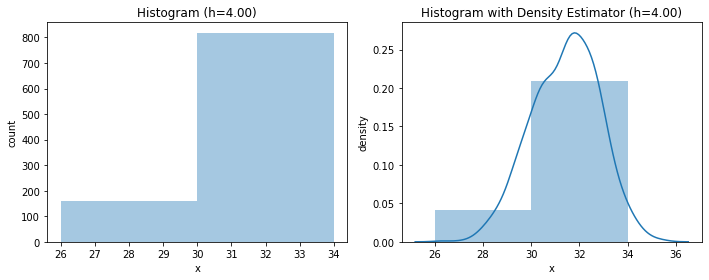

In [6]:
def Q1DEFG(h):
    numBins = int((b-a)/h)
    length = len(sample)
    
    fig, axs = plt.subplots(ncols=2, figsize=(10,4))
    sns.distplot(sample['x'], bins=[a+(h*i) for i in range(int((b-a)/h) + 1)], kde=False, rug=False, ax=axs[0])
    sns.distplot(sample['x'], bins=[a+(h*i) for i in range(int((b-a)/h) + 1)], kde=True, rug=False, ax=axs[1])
    axs[0].set(xlabel='x', ylabel='count', title='Histogram (h=%.2f)'%h)
    axs[1].set(xlabel='x', ylabel='density', title='Histogram with Density Estimator (h=%.2f)'%h)
    plt.tight_layout()
    plt.show()
    
    
Q1DEFG(4)

In [385]:
w = lambda u: 1 if -1/2 < u <= 1/2 else 0

def p(m):
    fn = lambda xj, mi, h: w((xj-mi)/h)
    N = sample.shape[0]
    return sum([fn(sample.iloc[i]['x'], m, h) for i in range(N)])/(N*h)



for h in [0.25, 0.5, 1, 2]: 
    for i in range(int((b-a)/h) + 1):
        x = a + (i + .5)*h
        print('(%.3f, %.3f)'%(x, p(x)))

(26.125, 0.000)
(26.375, 0.004)
(26.625, 0.000)
(26.875, 0.000)
(27.125, 0.004)
(27.375, 0.000)
(27.625, 0.008)
(27.875, 0.016)
(28.125, 0.024)
(28.375, 0.036)
(28.625, 0.036)
(28.875, 0.072)
(29.125, 0.060)
(29.375, 0.148)
(29.625, 0.112)
(29.875, 0.188)
(30.125, 0.148)
(30.375, 0.268)
(30.625, 0.184)
(30.875, 0.228)
(31.125, 0.176)
(31.375, 0.332)
(31.625, 0.240)
(31.875, 0.324)
(32.125, 0.228)
(32.375, 0.284)
(32.625, 0.212)
(32.875, 0.228)
(33.125, 0.108)
(33.375, 0.132)
(33.625, 0.052)
(33.875, 0.064)
(34.125, 0.036)
(34.375, 0.024)
(34.625, 0.012)
(34.875, 0.008)
(35.125, 0.000)
(35.375, 0.008)
(35.625, 0.000)
(35.875, 0.000)
(36.125, 0.000)
(26.250, 0.002)
(26.750, 0.000)
(27.250, 0.002)
(27.750, 0.012)
(28.250, 0.030)
(28.750, 0.054)
(29.250, 0.104)
(29.750, 0.150)
(30.250, 0.208)
(30.750, 0.206)
(31.250, 0.254)
(31.750, 0.282)
(32.250, 0.256)
(32.750, 0.220)
(33.250, 0.120)
(33.750, 0.058)
(34.250, 0.030)
(34.750, 0.010)
(35.250, 0.004)
(35.750, 0.000)
(36.250, 0.000)
(26.500,

In [ ]:
Q1DEFG(0.25)

In [248]:
n = len(sample)

2*iqr/math.pow(n, -1/3)

40.01332889135637

## Question 2: Box plots

In [65]:
# 2.a: What is the five-number summary of x?  What are the values of the 1.5 IQR whiskers?
_, _, _, min, q1, median, q3, max = sample.describe()['x']

iqr = q3-q1
iqr_low = q1 - 1.5*iqr
iqr_high = q3 + 1.5*iqr

print('Min: ', min)
print('Q1:  ', q1)
print('Med: ', median)
print('Q3:  ', q3)
print('Max: ', max)
print('=============')
print('IQR: ', iqr)
print('1.5*IQR Range: [', iqr_low, '-', iqr_high, ']')

Min:  26.3
Q1:   30.4
Med:  31.5
Q3:   32.4
Max:  35.4
IQR:  2.0
1.5*IQR Range: [ 27.4 - 35.4 ]


In [66]:
# 2.b: What is the five-number summary of x for each category of the group? What are the values of the 1.5 
#      IQR whiskers for each category of the group?

print( sample.groupby(['group']).describe()['x'], '\n')

# Group 0
IQR_g0 = 30.6 - 29.4
IQR_g0_lo = 29.4 - 1.5*IQR_g0
IQR_g0_hi = 30.6 + 1.5*IQR_g0

#Group 1
IQR_g1 = 32.7 - 31.4
IQR_g1_lo = 31.4 - 1.5*IQR_g1
IQR_g1_hi = 32.7 + 1.5*IQR_g1

print('[Group 0]')
print('IQR: %.3f' % IQR_g0)
print('1.5*IQR Range: [%.3f - %.3f]\n' % (IQR_g0_lo, IQR_g0_hi))

print('[Group 1]')
print('IQR: %.3f' % IQR_g1)
print('1.5*IQR Range: [%.3f - %.3f]\n' % (IQR_g1_lo, IQR_g1_hi))

       count       mean       std   min   25%   50%   75%   max
group                                                          
0      315.0  30.004127  0.973935  26.3  29.4  30.0  30.6  32.2
1      686.0  32.062245  1.040236  29.1  31.4  32.1  32.7  35.4 

[Group 0]
IQR: 1.200
1.5*IQR Range: [27.600 - 32.400]

[Group 1]
IQR: 1.300
1.5*IQR Range: [29.450 - 34.650]



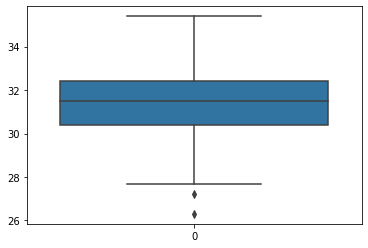

In [252]:
# 2.c: Yes, because it correctly represents two low outliers (<27.4) and no high outliers (>35.4).

sns.boxplot(data=sample['x'])

In [68]:
sample[sample['x'] < iqr_low]
# sample[sample['x'] > iqr_high]

,i,group,x
70,70,0,27.2
295,295,0,26.3


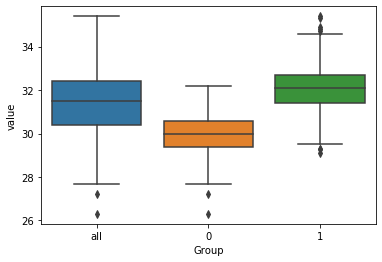

In [69]:
# 2.d: Draw a graph where it contains the boxplot of x, the boxplot of x for each category of Group 
#      (i.e., three boxplots within the same graph frame).  Use the 1.5 IQR whiskers, identify the outliers of x, 
#      if any, for the entire data and for each category of the group.

g0, g1 = [x for _, x in sample.groupby('group')['x']]
all = sample['x']

g0 = pd.DataFrame(g0).assign(Group='0')
g1 = pd.DataFrame(g1).assign(Group='1')
all = pd.DataFrame(all).assign(Group='all')

cgrp = pd.concat([all, g0, g1])
mgrp = pd.melt(cgrp, id_vars=['Group'], var_name=['Number'])

sns.boxplot(x="Group", y="value", data=mgrp)

In [70]:
# #Outliers
# print( sample[sample['x'] < iqr_low] )
# print( sample[sample['x'] > iqr_high])

print('\n[OUTLIERS FOR THE ENTIRE DATA]')
print( sample[(sample['x'] < iqr_low) | (sample['x'] > iqr_high)]['x'] )

print('\n[OUTLIERS FOR GROUP 0]')
print( g0[(g0['x'] < IQR_g0_lo) | (g0['x'] > IQR_g0_hi)]['x'] )

print('\n[OUTLIERS FOR GROUP 1]')
print( g1[(g1['x'] < IQR_g1_lo) | (g1['x'] > IQR_g1_hi)]['x'] )


[OUTLIERS FOR THE ENTIRE DATA]
70     27.2
295    26.3
Name: x, dtype: float64

[OUTLIERS FOR GROUP 0]
70     27.2
295    26.3
Name: x, dtype: float64

[OUTLIERS FOR GROUP 1]
30     35.3
107    29.3
297    35.4
812    34.9
846    34.7
907    34.8
938    29.3
975    29.1
Name: x, dtype: float64


## Question 3: kNN

In [258]:
fraud = pd.read_csv('fraud.csv')
fraud.head()

,CASE_ID,FRAUD,TOTAL_SPEND,DOCTOR_VISITS,NUM_CLAIMS,MEMBER_DURATION,OPTOM_PRESC,NUM_MEMBERS
0,1,1,1100,11,0,94,1,2
1,2,1,1300,7,2,122,0,1
2,3,1,1500,4,0,149,1,3
3,4,1,1500,9,0,180,1,1
4,5,0,1700,3,0,93,0,1


In [259]:
# 3.a: What percent of investigations are found to be fraudulent?  Please give your answer up to 4 decimal places.
num_fraud = fraud[fraud['FRAUD'] == 1].count()['FRAUD']
num_investigations = len(fraud)

print('Percentage of fraudulent investigations: %.4f' % (num_fraud/num_investigations))

Percentage of fraudulent investigations: 0.1995


In [374]:
# 3.b: 
fraud_interval = fraud.drop(['FRAUD', 'CASE_ID'], axis=1)
fraud_long = pd.melt(fraud, id_vars=['FRAUD'])
fraud_long.drop(fraud_long[fraud_long['variable'] == 'CASE_ID'].index)

totalSpend = fraud_long[ fraud_long['variable'] == 'TOTAL_SPEND']
doctorVisits = fraud_long[ fraud_long['variable'] == 'DOCTOR_VISITS']
numClaims = fraud_long[ fraud_long['variable'] == 'NUM_CLAIMS']
memberDuration = fraud_long[ fraud_long['variable'] == 'MEMBER_DURATION']
optomPresc = fraud_long[ fraud_long['variable'] == 'OPTOM_PRESC']
numMembers = fraud_long[ fraud_long['variable'] == 'NUM_MEMBERS']

lizzums = [totalSpend, doctorVisits, numClaims, memberDuration, optomPresc, numMembers]


def Q3B():
    
#     fig, axs = plt.subplots(ncols=6, figsize=(10,4))
    for i, var in enumerate(lizzums):
        sns.boxplot(x='value', y='variable', hue='FRAUD', data=var)
#         axs[i].set(xlabel='value', ylabel='')

    
    plt.tight_layout()
    plt.show()

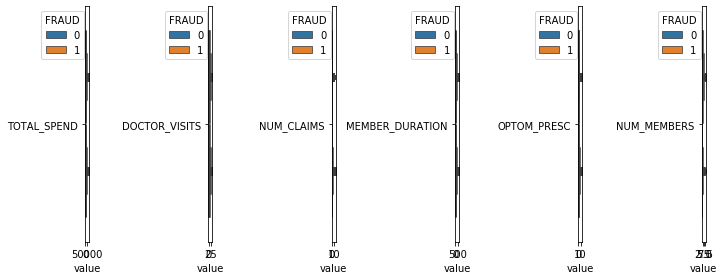

In [373]:
Q3B()

In [335]:
# 3.c:
#    a: There are six dimensions whose corresponding evalues>1.0
#    b: 
x = fraud_interval.to_numpy()
xtx = x.transpose().dot(x)
evals, evecs = LA.eigh(xtx)
print("Eigenvalues of x = \n", evals)
print("Eigenvectors of x = \n",evecs)

# Here is the transformation matrix
transf = np.dot(evecs, LA.inv(np.sqrt(np.diagflat(evals))));
print("Transformation Matrix = \n", transf)

# Here is the transformed X
transf_x = np.dot(x, transf);
print("The Transformed x = \n", transf_x)

# Check columns of transformed X
xtx = np.dot(transf_x.T, transf_x)
print("Expect an Identity Matrix = \n", xtx)


Eigenvalues of x = 
 [6.84728061e+03 8.38798104e+03 1.80639631e+04 3.15839942e+05
 8.44539131e+07 2.81233324e+12]
Eigenvectors of x = 
 [[-5.37750046e-06 -2.20900379e-05  3.62806809e-05 -1.36298664e-04
  -7.26453432e-03  9.99973603e-01]
 [ 6.05433402e-03 -2.69942162e-02  1.27528313e-02  9.99013423e-01
   3.23120126e-02  3.69879256e-04]
 [-9.82198935e-01  1.56454700e-01 -1.03312781e-01  1.14463687e-02
   1.62110700e-03  1.52596881e-05]
 [ 1.59310591e-04 -4.91894718e-03  3.11864824e-03 -3.25018102e-02
   9.99428355e-01  7.25592222e-03]
 [ 6.90939783e-02 -2.10615119e-01 -9.75101628e-01  6.26672294e-03
   2.19857585e-03  4.79234486e-05]
 [ 1.74569737e-01  9.64577791e-01 -1.95782843e-01  2.73038995e-02
   6.21788707e-03  7.82430481e-05]]
Transformation Matrix = 
 [[-6.49862374e-08 -2.41194689e-07  2.69941036e-07 -2.42525871e-07
  -7.90492750e-07  5.96286732e-07]
 [ 7.31656633e-05 -2.94741983e-04  9.48855536e-05  1.77761538e-03
   3.51604254e-06  2.20559915e-10]
 [-1.18697179e-02  1.70828329

In [349]:
# 3-d.
#    i: 81.96%
#   ii: It returns the mean accuracy on the given test data and labels.
X = transf_x  # transformed X from part c
y = fraud['FRAUD'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
neigh.fit(X, y)
neigh.score(X, y)

0.8778523489932886

In [338]:
# 3-e.
# Specify the kNN
kNN_model = kNN(n_neighbors = 5, algorithm = 'brute', metric = 'euclidean')
nbrs = kNN_model.fit(X, y)
distances, indices = nbrs.kneighbors(X)

focal = [[7500, 15, 4, 127, 2, 2]]

transf_focal = focal * transf

myNeighbors_t = nbrs.kneighbors(transf_focal, return_distance = False)
print("My Neighbors = \n", myNeighbors_t)

My Neighbors = 
 [[ 553  425 1101  457 1232]
 [3870 3160 5202 4968  176]
 [  31 5673 4228 5416 4776]
 [1030 1245 1231  733  369]
 [2748 2173 2224  776 1893]
 [2173 2748  776 2224  478]]


In [348]:
fraud[fraud['TOTAL_SPEND'] == 1101]

,CASE_ID,FRAUD,TOTAL_SPEND,DOCTOR_VISITS,NUM_CLAIMS,MEMBER_DURATION,OPTOM_PRESC,NUM_MEMBERS


In [293]:
# 3-f.
neigh_prediction = neigh.predict(X_test)
sum(neigh_prediction == 1) / len(neigh_prediction)

0.10067114093959731

In [295]:
neigh.predict(focal)

array([0])